The code execution is done using **GOOGLE COLAB**.
Steps to create new colab notebook:
1.open google drive.
2.Click on New files->more-> google colab.

**GPU Setting in colab**
1.In menu -> runtime -> change runtime -> under notebook setting, hardware accelerator; select GPU -> click ok.

In [1]:
# To check if GPU is running or not, run the following command

In [2]:
!nvidia-smi

Sun Apr  4 22:40:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# To check if PyTorch is capable of using GPU, use the following code

In [4]:
import torch
torch.cuda.is_available()
# Output would be True if Pytorch is using GPU otherwise it would be False.

True

In [5]:
# install the following dependencies 

In [6]:
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     |████████████████████████████████| 276kB 21.6MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=fc68dcf1d98908a802c7553364ac2981a9dcc502204494cf942e7fef9d10ffc2
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
1.8.1+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [7]:
import torch
assert torch.__version__.startswith("1.8") 
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
     |████████████████████████████████| 6.2MB 579kB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-cp37-none-any.whl size=58543 sha256=6fb8598d8813863e3de6c476cc501cedee9644e0e9dbbbe0a81bb59a091c5950
  Stored in directory: /root/.cache/pip/wheels/d2/ee/3a/5c531df777c03d8c67f22c65f97d6f75321087482d05a9b218
Successfully built fvcore


In [1]:
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# importing few common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# importing few common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [2]:
# to read a video and save the frames to a folder.

In [3]:
%%time
!rm -r frames/*
!mkdir frames/

#specify path to video
video = "sample.mp4"

#capture video
cap = cv2.VideoCapture(video)
cnt=0

# Check if video file is opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

ret,first_frame = cap.read()

#Read until video is completed
while(cap.isOpened()):
    
  # Capture frame-by-frame
  ret, frame = cap.read()
     
  if ret == True:

    #save each frame to folder        
    cv2.imwrite('frames/'+str(cnt)+'.png', frame)
    cnt=cnt+1
    if(cnt==750):
      break

  # Break the loop
  else: 
    break

mkdir: cannot create directory ‘frames/’: File exists
CPU times: user 30.5 s, sys: 741 ms, total: 31.2 s
Wall time: 26.4 s


In [4]:
# To check the frame rate of a video

In [5]:
# frame rate of video
FPS=cap.get(cv2.CAP_PROP_FPS)
print(FPS)

25.0


In [6]:
# Download the pre-trained model for object detection from Detectron 2’s model zoo and then the model is ready for inference:

In [7]:
cfg = get_cfg()

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)

In [8]:
# Reading an image and passing it the predictor

In [9]:
#read an image
img = cv2.imread("frames/30.png")

#pass to the model
outputs = predictor(img)

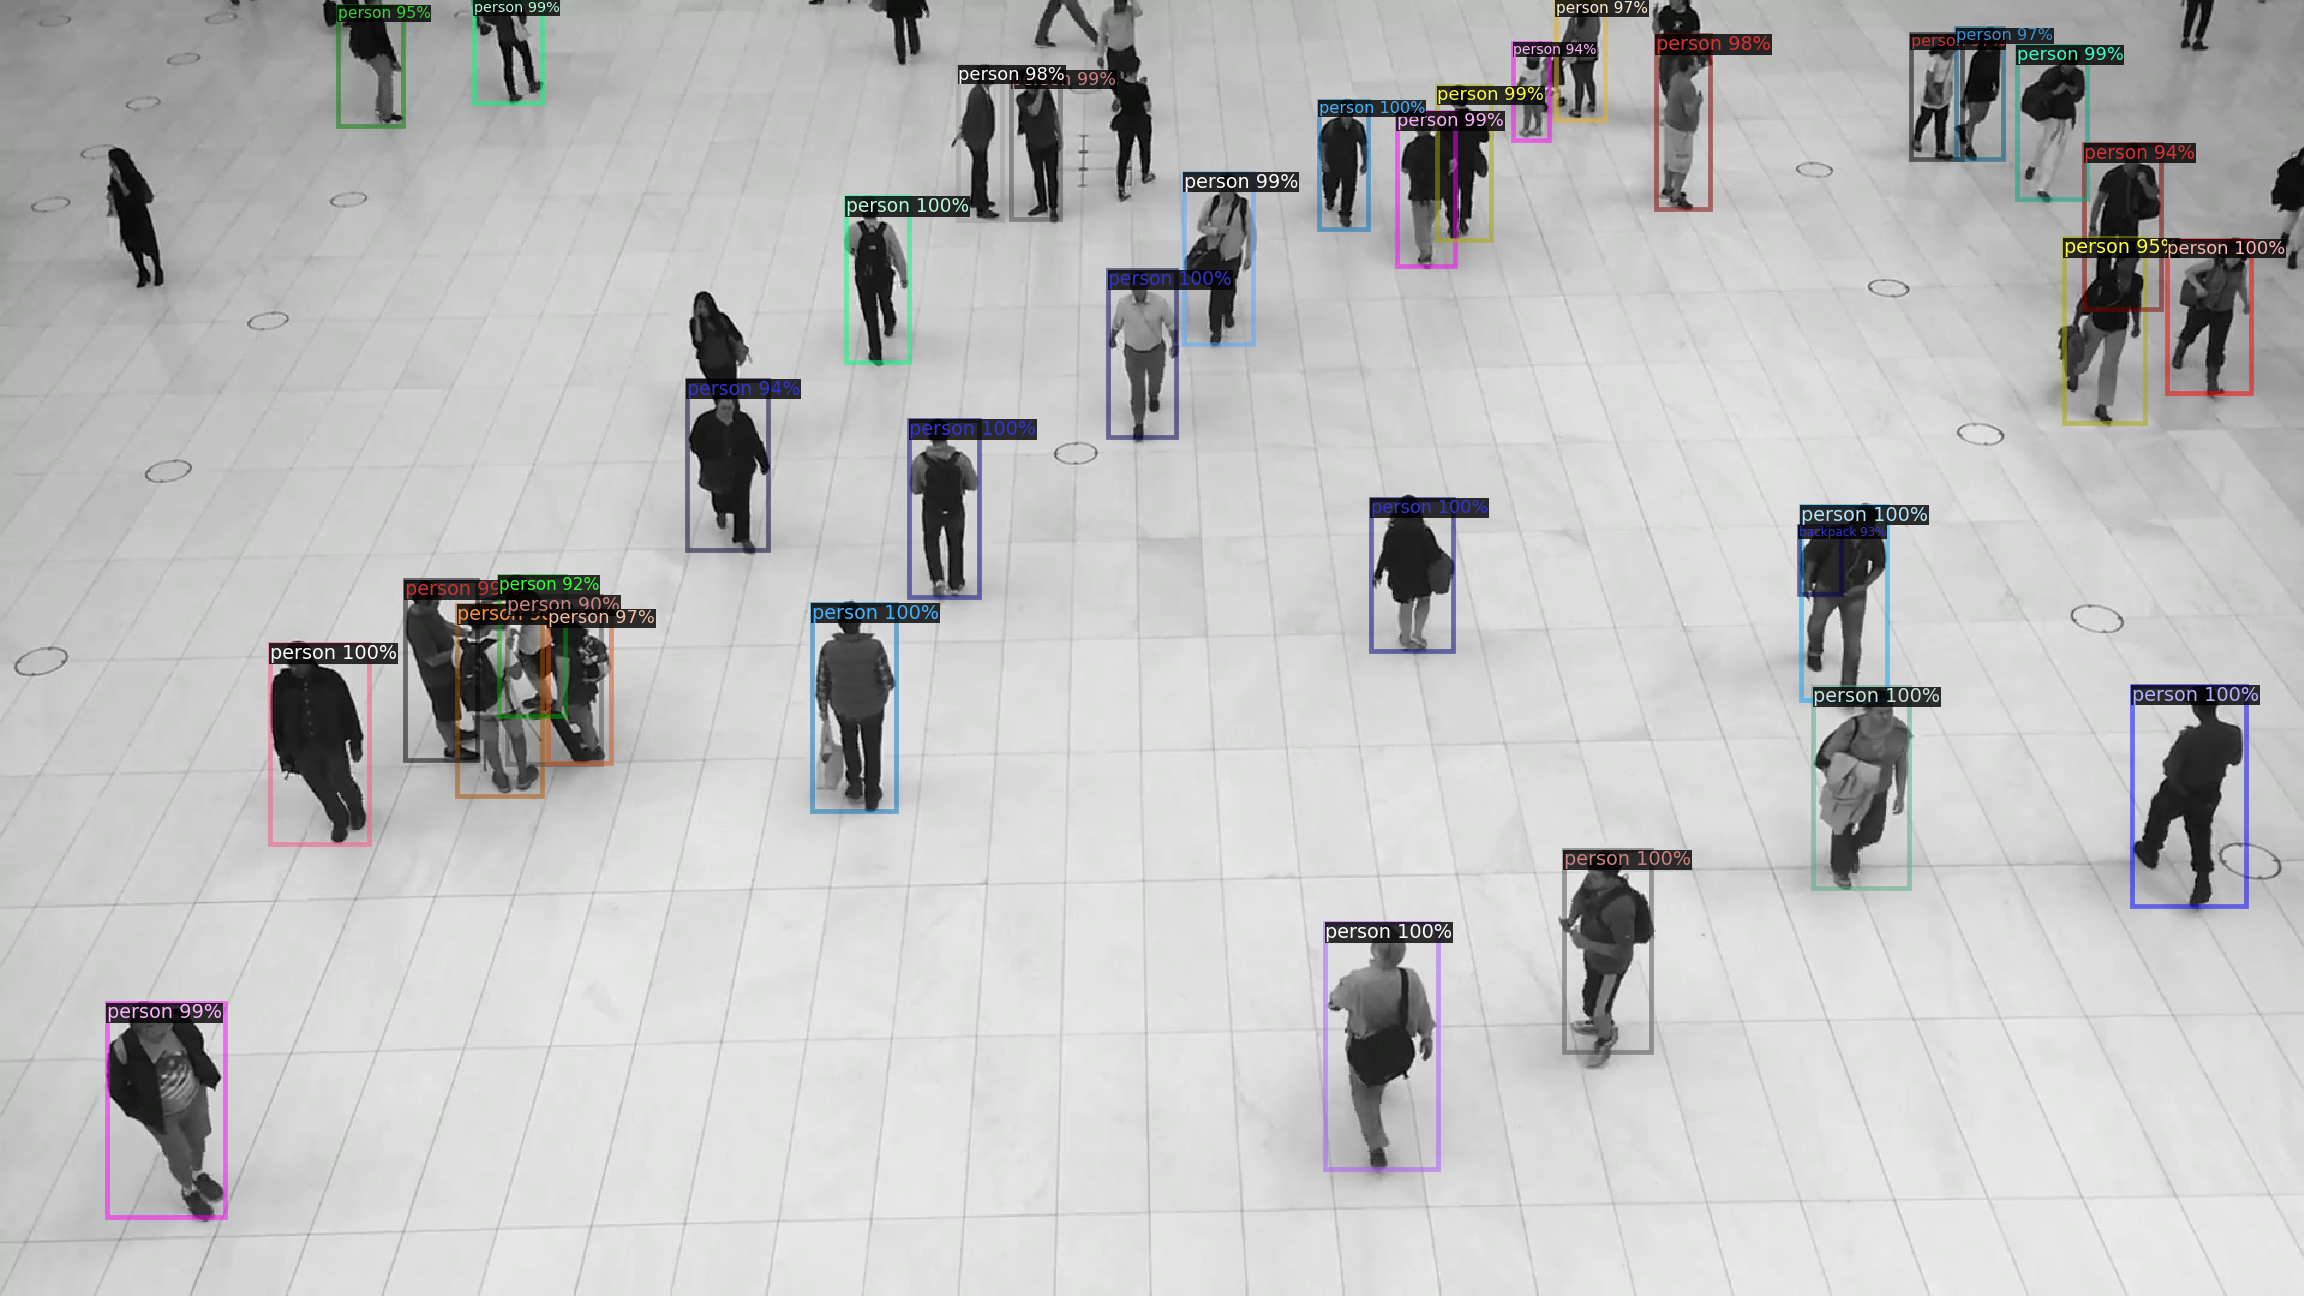

In [10]:
# Use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [11]:
#understanding the objects present in an image

In [12]:
classes=outputs['instances'].pred_classes.cpu().numpy()
print(classes)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 24  0  0]


In [13]:
# glance at the bounding boxes of an object

In [14]:
bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
print(bbox)

[[7.57819824e+02 3.50057373e+02 8.15878357e+02 4.97478363e+02]
 [6.76557312e+02 5.02995880e+02 7.47026245e+02 6.75492493e+02]
 [1.10453943e+03 7.69350098e+02 1.19844373e+03 9.74245972e+02]
 [1.50050391e+03 4.21285797e+02 1.57270129e+03 5.83657471e+02]
 [1.30311902e+03 7.08660889e+02 1.37591638e+03 8.76286255e+02]
 [1.77652954e+03 5.71441650e+02 1.87124597e+03 7.55203064e+02]
 [2.25202850e+02 5.36688477e+02 3.07891632e+02 7.03511658e+02]
 [9.23733582e+02 2.25410110e+02 9.80052856e+02 3.64261475e+02]
 [1.80604919e+03 1.99825516e+02 1.87619580e+03 3.27475128e+02]
 [1.51112476e+03 5.72872192e+02 1.59075916e+03 7.40320496e+02]
 [1.14222815e+03 4.15753479e+02 1.21049719e+03 5.42288269e+02]
 [7.04763367e+02 1.64181915e+02 7.57597229e+02 3.01470947e+02]
 [1.09924292e+03 8.41354065e+01 1.14012207e+03 1.91068817e+02]
 [3.37117371e+02 4.83722778e+02 3.97261047e+02 6.33378723e+02]
 [3.94923706e+02 6.91537201e-01 4.51701355e+02 8.60728531e+01]
 [8.90334854e+01 8.36075317e+02 1.87400253e+02 1.014533

In [15]:
# As different objects are present in an image, let’s identify classes and bounding boxes related to only the people:

In [16]:
#identity only persons 
ind = np.where(classes==0)[0]

#identify bounding box of only persons
person=bbox[ind]

#total no. of persons
num= len(person)

In [17]:
#format of the bounding box

In [18]:
x1,y1,x2,y2 = person[0]
print(x1,y1,x2,y2)

757.8198 350.05737 815.87836 497.47836


In [19]:
# Drawing a bounding box for one of the people

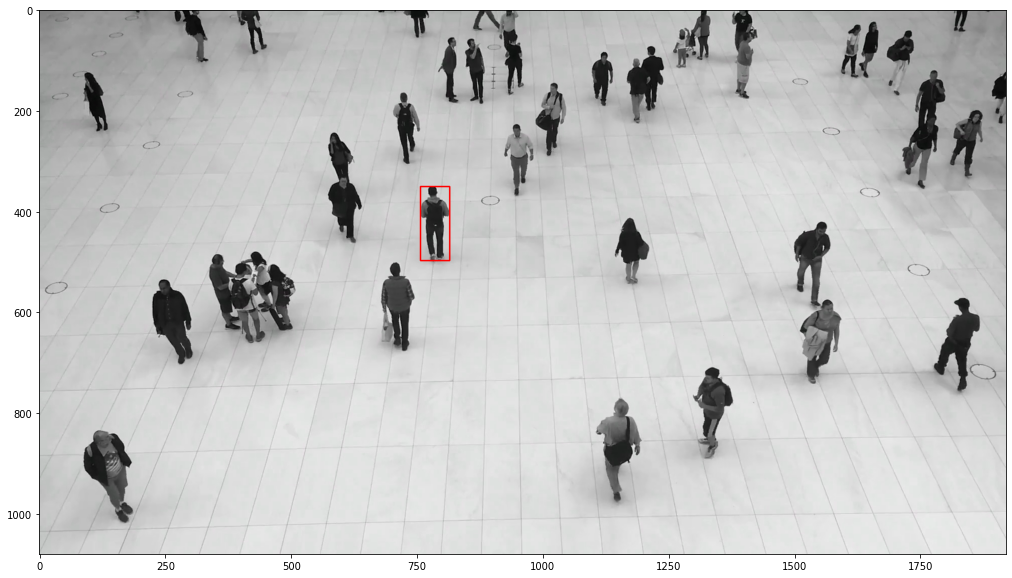

In [20]:
img = cv2.imread('frames/30.png')
_ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(img)

In [21]:
# choosing the bottom center of a rectangle for representing each person to measure the distance 

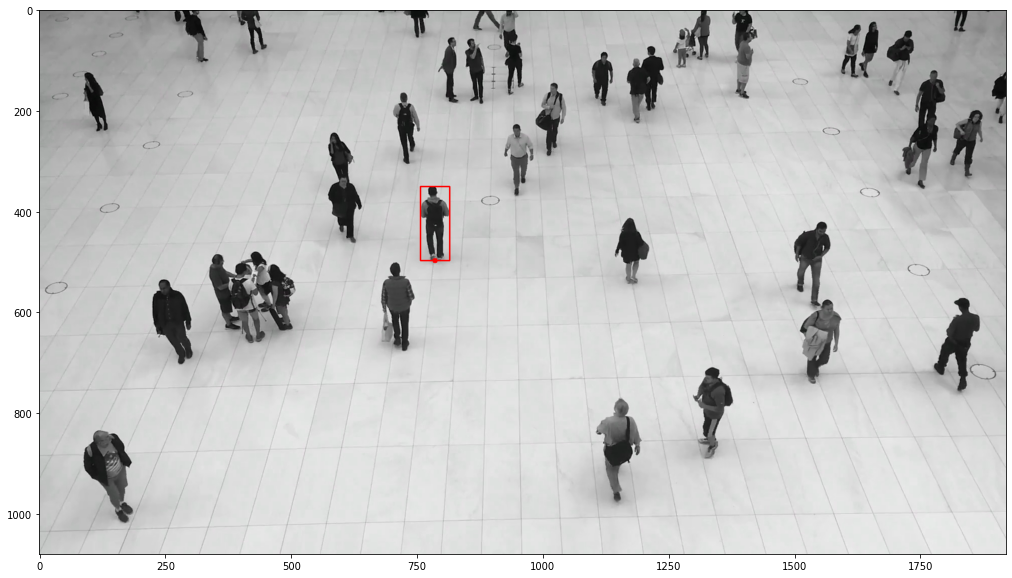

In [22]:
#compute center 
x_center = int((x1+x2)/2)
y_center = int(y2)

center = (x_center, y_center)

_ = cv2.circle(img, center, 5, (255, 0, 0), -1)
plt.figure(figsize=(20,10))
plt.imshow(img)

In [23]:
#define a function which return the bottom center of every bbox
def mid_point(img,person,idx):
  #get the coordinates
  x1,y1,x2,y2 = person[idx]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)
  
  #compute bottom center of bbox
  x_mid = int((x1+x2)/2)
  y_mid = int(y2)
  mid   = (x_mid,y_mid)
  
  _ = cv2.circle(img, mid, 5, (0, 0, 255), -1)
  cv2.putText(img, str(idx), mid, cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2, cv2.LINE_AA)
  
  return mid

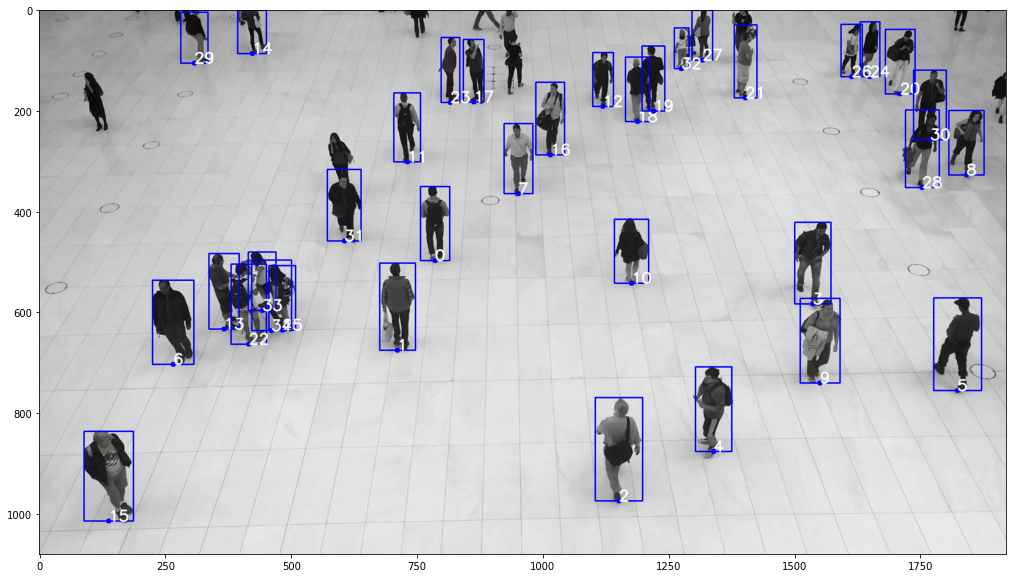

In [24]:
#call the function
midpoints = [mid_point(img,person,i) for i in range(len(person))]

#visualize image
plt.figure(figsize=(20,10))
plt.imshow(img)

In [25]:
# Defining a function to compute the Euclidean distance between every two points in an image

In [26]:
%%time
from scipy.spatial import distance
def compute_distance(midpoints,num):
  dist = np.zeros((num,num))
  for i in range(num):
    for j in range(i+1,num):
      if i!=j:
        dst = distance.euclidean(midpoints[i], midpoints[j])
        dist[i][j]=dst
  return dist

CPU times: user 79.8 ms, sys: 71.6 ms, total: 151 ms
Wall time: 129 ms


In [27]:
# Computing the distance between every pair of points

In [28]:
dist= compute_distance(midpoints,num)

In [29]:
# Define a function that returns the closest people based on the given proximity distance.

In [30]:
%%time
def find_closest(dist,num,thresh):
  p1=[]
  p2=[]
  d=[]
  for i in range(num):
    for j in range(i,num):
      if( (i!=j) & (dist[i][j]<=thresh)):
        p1.append(i)
        p2.append(j)
        d.append(dist[i][j])
  return p1,p2,d

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [31]:
# Set the threshold for the proximity distance

In [32]:
import pandas as pd

thresh=100
p1,p2,d=find_closest(dist,num,thresh)
df = pd.DataFrame({"p1":p1,"p2":p2,"dist":d})
df

,p1,p2,dist
0,8,28,91.482239
1,12,18,75.239617
2,13,22,57.454330
3,13,33,84.528102
4,13,34,94.047860
5,17,23,47.010637
6,18,19,38.275318
7,20,24,68.963759
8,22,25,72.615425
9,22,33,72.235725


In [33]:
# Define a function to change the color of the closest people to red

In [34]:
def change_2_red(img,person,p1,p2):
  risky = np.unique(p1+p2)
  for i in risky:
    x1,y1,x2,y2 = person[i]
    _ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)  
  return img

In [35]:
# change the color of the closest people to red

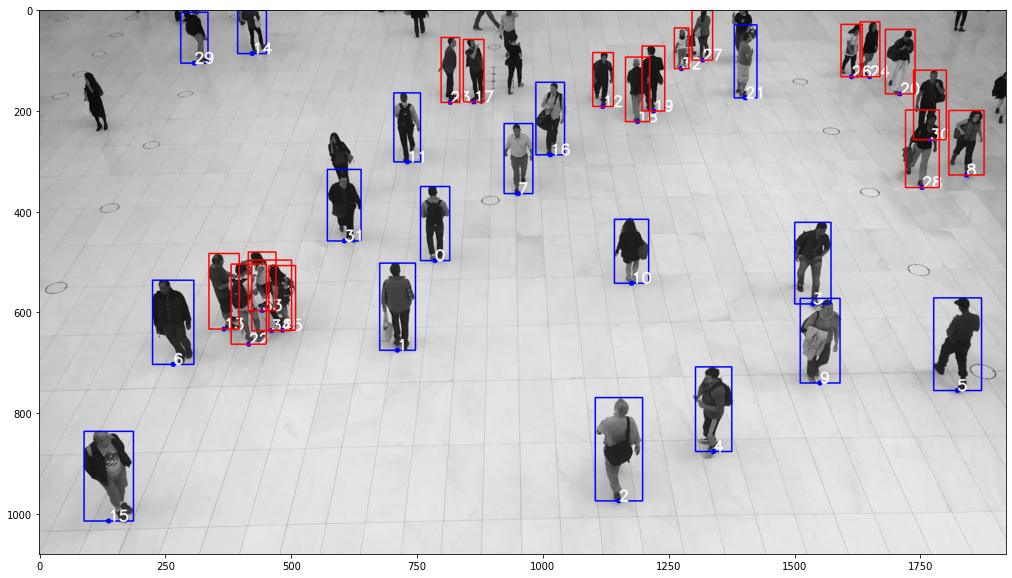

In [36]:
img = change_2_red(img,person,p1,p2)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [37]:
# Now applying the step by step procedure followed above to each and every frame of video

In [38]:
import os
import re

names=os.listdir('frames/')
names.sort(key=lambda f: int(re.sub('\D', '', f)))

In [39]:
# Define a function that performs all the steps we covered on each and every frame of the video

In [40]:
def find_closest_people(name,thresh):

  img = cv2.imread('frames/'+name)
  outputs = predictor(img)
  classes=outputs['instances'].pred_classes.cpu().numpy()
  bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
  ind = np.where(classes==0)[0]
  person=bbox[ind]
  midpoints = [mid_point(img,person,i) for i in range(len(person))]
  num = len(midpoints)
  dist= compute_distance(midpoints,num)
  p1,p2,d=find_closest(dist,num,thresh)
  img = change_2_red(img,person,p1,p2)
  cv2.imwrite('frames/'+name,img)
  return 0

In [41]:
# Identify the closest people in each frame and change the color to red

In [42]:
from tqdm import tqdm
thresh=100
_ = [find_closest_people(names[i],thresh) for i in tqdm(range(len(names))) ]

100%|██████████| 340/340 [03:09<00:00,  1.79it/s]


In [43]:
# converting the frames back to a video

In [44]:
%%time
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_array=[]

for i in range(len(frames)):
    
    #reading each files
    img = cv2.imread('frames/'+frames[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

out = cv2.VideoWriter('sample_output.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

CPU times: user 17.9 s, sys: 762 ms, total: 18.7 s
Wall time: 18.1 s
